Original number of features: 30
Original DataFrame head:
   mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  wor

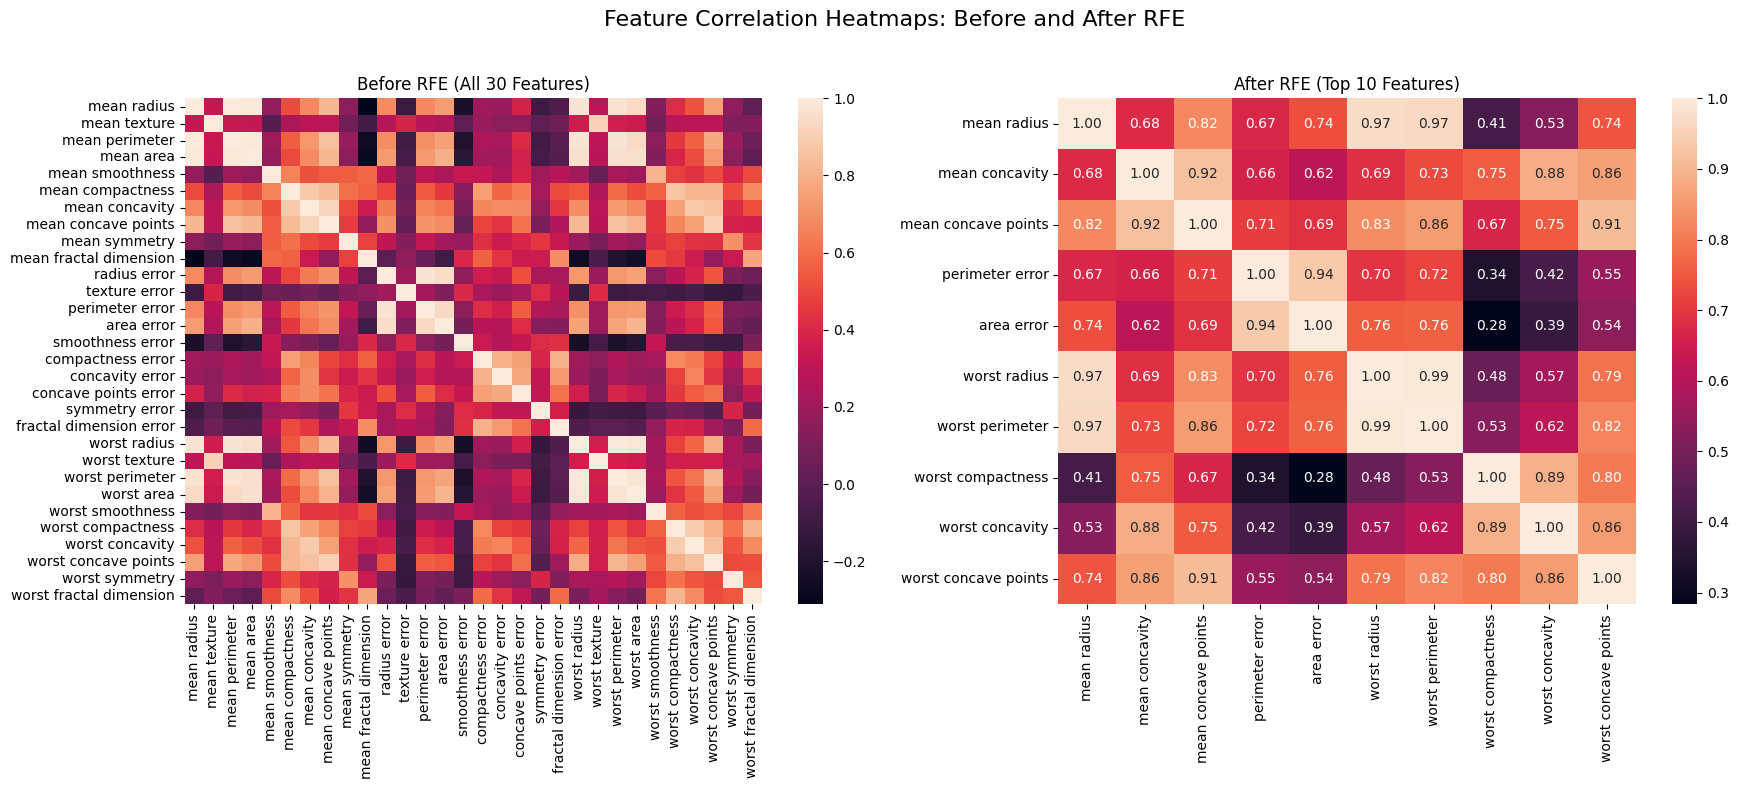

In [1]:
# -*- coding: utf-8 -*-
"""
Demonstrates Recursive Feature Elimination (RFE) for feature selection.

When to use RFE:
- When you have a large number of features and you suspect that many are redundant or irrelevant.
- To improve the performance of a machine learning model by removing noise from the data.
- To create simpler, more interpretable models.

Data Requirements:
- The data should be in a numerical format. Categorical features need to be encoded.
- RFE requires a supervised learning model that provides access to feature importances
  (like tree-based models) or coefficients (like linear models).
"""

import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Load a Relevant Dataset ---
# We'll use the Wisconsin Breast Cancer dataset from scikit-learn.
# It's a good dataset for this purpose because it has 30 numerical features.
cancer = load_breast_cancer()
X = pd.DataFrame(cancer.data, columns=cancer.feature_names)
y = pd.Series(cancer.target)

# Display the original shape of the data
print("Original number of features:", X.shape[1])
print("Original DataFrame head:")
print(X.head())
print("-" * 30)


# --- 2. Select an Estimator and Apply RFE ---
# RFE works by recursively removing the least important feature.
# We need to choose an estimator that assigns weights to features,
# such as a Logistic Regression or a Random Forest.
# Here, we'll use Logistic Regression.

# We will tell RFE to select the top 10 features.
estimator = LogisticRegression(max_iter=5000, solver='liblinear')
# The RFE object takes the estimator and the number of features to select.
# n_features_to_select specifies the desired number of features.
rfe = RFE(estimator=estimator, n_features_to_select=10)

# Fit RFE to the data. This will perform the recursive feature elimination.
rfe.fit(X, y)


# --- 3. Show the Results ---
# The `support_` attribute of the fitted RFE object is a boolean array
# indicating which features were selected.
selected_features_mask = rfe.support_
print("Mask of selected features:")
print(selected_features_mask)
print("-" * 30)

# The `ranking_` attribute shows the ranking of each feature.
# Selected features are ranked 1.
feature_ranking = rfe.ranking_
print("Feature ranking array:")
print(feature_ranking)
print("-" * 30)

# Let's create a DataFrame to view the features and their rankings together.
feature_ranking_df = pd.DataFrame({
    'Feature': X.columns,
    'Ranking': rfe.ranking_
}).sort_values(by='Ranking')

print("Features ranked by RFE (1 is best):")
print(feature_ranking_df)
print("-" * 30)


# Let's get the names of the selected columns from the mask
selected_feature_names = X.columns[selected_features_mask]
print("Selected feature names:")
print(list(selected_feature_names))
print("-" * 30)


# --- 4. Create a New DataFrame with Selected Features ---
# We can now create a new DataFrame containing only the features selected by RFE.
X_rfe = X[selected_feature_names]

# Print the head of the new DataFrame
print("Head of the DataFrame with RFE-selected features:")
print(X_rfe.head())
print("-" * 30)
print("New number of features:", X_rfe.shape[1])


# --- 5. Before-and-After Visualization ---
# A correlation heatmap can visualize the change in feature space.
# We'll show the heatmap of the original features and the selected features.

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 8))
fig.suptitle('Feature Correlation Heatmaps: Before and After RFE', fontsize=16)

# Before RFE
sns.heatmap(X.corr(), ax=axes[0])
axes[0].set_title('Before RFE (All 30 Features)')

# After RFE
sns.heatmap(X_rfe.corr(), ax=axes[1], annot=True, fmt=".2f")
axes[1].set_title('After RFE (Top 10 Features)')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()
